Here we present some tools which were used preparing the experiments.

In [1]:
!pip install Biopython
!pip install gdown
!pip install pydna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 4.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import json
import gdown
import gc
from pydna.assembly import Assembly
from pydna.dseqrecord import Dseqrecord
from pydna.design import primer_design, assembly_fragments
%matplotlib inline

In [4]:
url = 'https://drive.google.com/uc?id=1P-dkZg7Uy0NPdzUwY-a-qpTsNfw4FURX'
output = 'salmonella-enterica.reads.fna'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1Or3tTlBb98A8u84XaCEpZPiK-IOYjzgh'
output = 'salmonella-enterica-variant.reads.fna'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P-dkZg7Uy0NPdzUwY-a-qpTsNfw4FURX
To: /content/salmonella-enterica.reads.fna
100%|██████████| 523M/523M [00:02<00:00, 235MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Or3tTlBb98A8u84XaCEpZPiK-IOYjzgh
To: /content/salmonella-enterica-variant.reads.fna
100%|██████████| 523M/523M [00:03<00:00, 170MB/s]


'salmonella-enterica-variant.reads.fna'

In [5]:
def build_kmers(sequence, dict_kmers, ksize):
    """
    Build k-mers from sequence
    """ 
    for i in range(len(sequence) - ksize + 1):
        kmer = sequence[i:i + ksize]
        if kmer not in dict_kmers:
            dict_kmers[kmer] = 0
        dict_kmers[kmer] += 1
    return

def check_kmer(path, KSIZE):
  """
  Return dict of KSIZEmers in genome, sequencing
  representation of which is saved in path
  """
  dict_kmers = {}
  fasta_sequences = SeqIO.parse(open(path), 'fasta')
  for fasta in fasta_sequences:
    build_kmers(str(fasta.seq), dict_kmers, KSIZE)
  return dict_kmers

In [6]:
file_genome = "./salmonella-enterica.reads.fna"
file_genome_var = "./salmonella-enterica-variant.reads.fna"

In [7]:
dict_kmers_original = check_kmer(file_genome, KSIZE=25)
dict_kmers_variant = check_kmer(file_genome_var, KSIZE=25)

In [8]:
list_kmers_original = [dict_kmers_original[k] for k in dict_kmers_original.keys() if k not in dict_kmers_variant.keys()]
list_kmers_variant = [dict_kmers_variant[k] for k in dict_kmers_variant.keys() if k not in dict_kmers_original.keys()]

Text(0.5, 1.0, 'list_kmers_original')

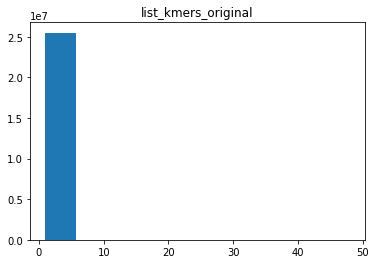

In [9]:
plt.hist(list_kmers_original)
plt.title("list_kmers_original")

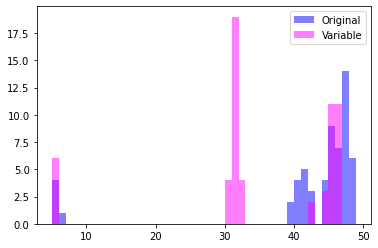

In [17]:
plt.hist(list_kmers_original, bins=range(5, 50), fc=(0, 0, 1, 0.5), label="Original")
plt.hist(list_kmers_variant, bins=range(5, 50), fc=(1, 0, 1, 0.5), label="Variable")
plt.legend()
plt.show()

In [22]:
kmers_assembly = [Dseqrecord(k) for k, f in dict_kmers_original.items() if ((f > 28) & (f < 34) & (k not in dict_kmers_variant))]

In [ ]:
seq = Assembly(kmers_assembly, limit = 24).assemble_linear()
print(seq[0].seq.watson)

In [ ]:
kmers_assembly_var = [Dseqrecord(k) for k, f in dict_kmers_variant.items() if ((f > 40) & (f < 50) & (k not in dict_kmers_original))]

In [ ]:
seq_var = Assembly(kmers_assembly_var,limit = 22).assemble_linear()
print(seq_var[0].seq.watson)

In [ ]:
kmers_assembly = [Dseqrecord(k) for k, f in dict_kmers_original.items() if ((f > 40) & (f < 42.5) & (k not in dict_kmers_variant))]

In [ ]:
seq = Assembly(kmers_assembly,limit = 22).assemble_linear()
print(seq[0].seq.watson)

In [ ]:
kmers_assembly_var = [Dseqrecord(k) for k, f in dict_kmers_variant.items() if ((f > 30) & (f < 35) & (k not in dict_kmers_original))]

In [ ]:
seq_var = Assembly(kmers_assembly_var,limit = 22).assemble_linear()
print(seq_var[0].seq.watson)